In [ ]:
#Zuzanna Waluś 1170496
#Bartosz Wilk 116305
# nazwa zespołu: Z                                                                                                         

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from IPython.display import Image

In [2]:
#projekt robiony w google colab, zbiory uploadowane jak poniżej (1 zbiór - wyniki meczów reprezentacji 1872-2022, drugi zbiór - pozycje r rankingu FIFA, zaktualizowane o ostatnie wyniki )
from google.colab import files
uploaded = files.upload()

Saving fifa_ranking_2022.csv to fifa_ranking_2022.csv
Saving results_after_3.csv to results_after_3.csv


In [3]:
import io
#do imporotwania plików w colabie
#df = pd.read_csv(io.BytesIO(uploaded['results.csv']), sep=';')
df = pd.read_csv('results_after_3.csv', sep=';')
print(df)

             date    home_team    away_team  home_score  away_score  \
0      1872-11-30     Scotland      England           0           0   
1      1873-03-08      England     Scotland           4           2   
2      1874-03-07     Scotland      England           2           1   
3      1875-03-06      England     Scotland           2           2   
4      1876-03-04     Scotland      England           3           0   
...           ...          ...          ...         ...         ...   
44147  01.12.2022       Canada      Morocco           1           2   
44148  02.12.2022       Serbia  Switzerland           2           3   
44149  02.12.2022     Cameroon       Brazil           1           0   
44150  02.12.2022        Ghana      Uruguay           0           2   
44151  02.12.2022  South Korea     Portugal           2           1   

           tournament       city   country  neutral  
0            Friendly    Glasgow  Scotland    False  
1            Friendly     London   Engl

In [4]:
df["date"] = pd.to_datetime(df["date"])
df.dropna(inplace=True)
df.sort_values("date").tail()
df = df[(df["date"] >= "2018-8-1")].reset_index(drop=True)

In [5]:
#wprowadzono podział na grupy MŚ22
Group_A= ["Qatar","Ecuador","Senegal","Netherlands"]
Group_B= ["England","Iran","United States","Wales"]
Group_C= ["Argentina","Saudi Arabia","Mexico","Poland"]
Group_D= ["France","Australia","Denmark","Tunisia"]
Group_E= ["Spain","Costa Rica","Germany","Japan"]
Group_F= ["Belgium","Canada","Morocco","Croatia"]
Group_G= ["Brazil","Serbia","Switzerland","Cameroon"]
Group_H= ["Portugal","Ghana","Uruguay","South Korea"]
Groups={"Group A":Group_A,"Group B":Group_B,"Group C":Group_C,"Group D":Group_D,"Group E":Group_E,"Group F":Group_F,"Group G":Group_G,"Group H":Group_H}

In [6]:
df.head(5)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,2018-11-01,Denmark,Sweden,0,1,Friendly,Abu Dhabi,United Arab Emirates,True
1,2018-11-01,Indonesia,Iceland,0,6,Friendly,Sleman,Indonesia,False
2,2018-11-01,Jordan,Finland,1,2,Friendly,Abu Dhabi,United Arab Emirates,True
3,2018-08-04,Barawa,Chagos Islands,4,1,Friendly,London,England,False
4,2018-08-05,Iraq,Palestine,0,0,Friendly,Basra,Iraq,False


In [7]:
countries=df.home_team.unique()
print(len(countries))
print(countries)
#print(f"{countries}")?jaka jest różnica - niektóre kraje jak np. Iran są dziwnie nazwane w tym zbiorze, więc rozwiewam wątpliwości

252
['Denmark' 'Indonesia' 'Jordan' 'Barawa' 'Iraq' 'Algeria' 'Kuwait'
 'Germany' 'Croatia' 'Switzerland' 'Lithuania' 'Poland' 'Taiwan'
 'South Africa' 'Madagascar' 'Zambia' 'Serbia' 'Sweden' 'Hungary'
 'Estonia' 'Latvia' 'Finland' 'Tunisia' 'France' 'Matabeleland' 'Tibet'
 'Kabylia' 'Panjab' 'Padania' 'Northern Cyprus' 'Austria' 'India'
 'South Korea' 'Belgium' 'Japan' 'Guatemala' 'Andorra' 'Grenada'
 'Barbados' 'Sint Maarten' 'Anguilla' 'Bangladesh' 'Macau' 'England'
 'Northern Ireland' 'Belarus' 'Luxembourg' 'Brunei' 'Equatorial Guinea'
 'Comoros' 'Gabon' 'Gambia' 'Mauritania' 'Egypt' 'Namibia' 'Uganda'
 'Pakistan' 'Saint Vincent and the Grenadines' 'Cuba' 'Montserrat'
 'Ukraine' 'Bulgaria' 'Cyprus' 'Georgia' 'North Macedonia' 'Liechtenstein'
 'Lebanon' 'Congo' 'Rwanda' 'Bonaire' 'United States Virgin Islands'
 'Aruba' 'Jamaica' 'Saint Kitts and Nevis' 'Portugal' 'Scotland'
 'Montenegro' 'Kosovo' 'Malta' 'Bahrain' 'Cambodia' 'Kyrgyzstan' 'Russia'
 'Saudi Arabia' 'Haiti' 'Curaçao' 'I

In [8]:
df.describe()

,home_score,away_score
count,3831.000000,3831.000000
mean,1.603498,1.087967
std,1.679450,1.328671
min,0.000000,0.000000
25%,0.000000,0.000000
50%,1.000000,1.000000
75%,2.000000,2.000000
max,15.000000,14.000000


In [9]:
df.isnull().sum()

date          0
home_team     0
away_team     0
home_score    0
away_score    0
tournament    0
city          0
country       0
neutral       0
dtype: int64

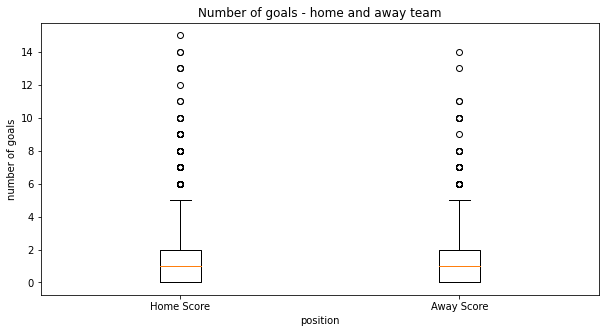

In [10]:
#sprawdzam częstotliwość padania bramek na mecz po stronie gospodarza i drużyny przyjezdnej
fig = plt.figure(figsize =(10, 5))
plt.boxplot([df["home_score"].dropna(),df["away_score"].dropna()])
plt.xticks([1,2], ["Home Score", "Away Score"])
plt.title(f"Number of goals - home and away team")
plt.ylabel("number of goals")
plt.xlabel("position")
plt.show()
#żeby wykres działał musi być dropna() bo są braki pojedyncze - poprawione i działa poprawnie

In [11]:
df.isnull()

#ew.sprawdzić 

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
3826,False,False,False,False,False,False,False,False,False
3827,False,False,False,False,False,False,False,False,False
3828,False,False,False,False,False,False,False,False,False
3829,False,False,False,False,False,False,False,False,False


In [12]:
df=df.dropna()
df.head(5)
#usunięta linijka bez wyniku

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,2018-11-01,Denmark,Sweden,0,1,Friendly,Abu Dhabi,United Arab Emirates,True
1,2018-11-01,Indonesia,Iceland,0,6,Friendly,Sleman,Indonesia,False
2,2018-11-01,Jordan,Finland,1,2,Friendly,Abu Dhabi,United Arab Emirates,True
3,2018-08-04,Barawa,Chagos Islands,4,1,Friendly,London,England,False
4,2018-08-05,Iraq,Palestine,0,0,Friendly,Basra,Iraq,False


In [13]:
df.isnull().sum()
#po usunięciu null jest ok

date          0
home_team     0
away_team     0
home_score    0
away_score    0
tournament    0
city          0
country       0
neutral       0
dtype: int64

In [14]:
df = df[(df["date"] >= "2018-8-1")].reset_index(drop=True)
df.sort_values("date").tail()
#model będzie się opierał na wynikach drużyn od 2018 roku czyli od początku kwalifikacji na MŚ22
#przy braniu pod uwagę starszych meczów gorsza skuteczność modelu - przy bardziej aktualnym stanie drużyn wyniki lepiej pasują do oczekiwanych przewidywań

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
3532,2022-12-06,Cuba,Antigua and Barbuda,3,1,CONCACAF Nations League,Santiago,Cuba,False
3533,2022-12-06,Guadeloupe,Barbados,2,1,CONCACAF Nations League,Les Abymes,Guadeloupe,False
3534,2022-12-06,Saint Kitts and Nevis,Saint Martin,1,1,CONCACAF Nations League,Basseterre,Saint Kitts and Nevis,False
3535,2022-12-06,Saint Lucia,Anguilla,2,0,CONCACAF Nations League,Gros Islet,Saint Lucia,False
3757,2022-12-11,Iraq,Ecuador,0,0,Friendly,Madrid,Spain,True


In [15]:
#upload zbioru rankingu fifa oraz dostosowanie dat
rank = pd.read_csv("fifa_ranking_2022.csv")
rank["rank_date"] = pd.to_datetime(rank["rank_date"])
rank = rank[(rank["rank_date"] >= "2018-8-1")].reset_index(drop=True)
rank["country_full"] = rank["country_full"].str.replace("IR Iran", "Iran").str.replace("Korea Republic", "South Korea").str.replace("USA", "United States")

In [16]:
#połączono 2 zbiory - wyniki meczów i pozycję w rankingu fifa
rank = rank.set_index(['rank_date']).groupby(['country_full'], group_keys=False).resample('D').first().fillna(method='ffill').reset_index()
df_wc_ranked = df.merge(rank[["country_full", "total_points", "previous_points", "rank", "rank_change", "rank_date"]], left_on=["date", "home_team"], right_on=["rank_date", "country_full"]).drop(["rank_date", "country_full"], axis=1)
df_wc_ranked = df_wc_ranked.merge(rank[["country_full", "total_points", "previous_points", "rank", "rank_change", "rank_date"]], left_on=["date", "away_team"], right_on=["rank_date", "country_full"], suffixes=("_home", "_away")).drop(["rank_date", "country_full"], axis=1)
df_wc_ranked[(df_wc_ranked.home_team == "Brazil") | (df_wc_ranked.away_team == "Brazil")].tail(10)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,total_points_home,previous_points_home,rank_home,rank_change_home,total_points_away,previous_points_away,rank_away,rank_change_away
2579,2021-11-16,Argentina,Brazil,0,0,FIFA World Cup qualification,San Juan,Argentina,False,1738.79,1725.31,6.0,0.0,1820.36,1811.73,2.0,0.0
2681,2022-01-27,Ecuador,Brazil,1,1,FIFA World Cup qualification,Quito,Ecuador,False,1448.27,1448.74,46.0,0.0,1826.35,1826.35,2.0,0.0
2714,2022-01-02,Brazil,Paraguay,4,0,FIFA World Cup qualification,Belo Horizonte,Brazil,False,1826.35,1826.35,2.0,0.0,1454.52,1454.52,43.0,0.0
2755,2022-03-24,Brazil,Chile,4,0,FIFA World Cup qualification,Rio de Janeiro,Brazil,False,1823.42,1826.35,2.0,0.0,1543.16,1543.42,26.0,2.0
2838,2022-03-29,Bolivia,Brazil,0,4,FIFA World Cup qualification,La Paz,Bolivia,False,1308.12,1324.21,76.0,-1.0,1823.42,1826.35,2.0,0.0
2929,2022-02-06,South Korea,Brazil,1,5,Friendly,Seoul,South Korea,False,1507.24,1507.24,33.0,0.0,1826.35,1826.35,2.0,0.0
2997,2022-06-06,Japan,Brazil,0,1,Friendly,Tokyo,Japan,False,1553.44,1549.82,23.0,0.0,1832.69,1823.42,1.0,-1.0
3136,2022-09-23,Brazil,Ghana,3,0,Friendly,Le Havre,France,True,1837.56,1837.56,1.0,0.0,1393.47,1389.68,60.0,0.0
3205,2022-09-27,Brazil,Tunisia,5,1,Friendly,Paris,France,True,1837.56,1837.56,1.0,0.0,1507.86,1507.86,30.0,0.0
3252,2022-02-12,Cameroon,Brazil,1,0,FIFA World Cup,Lusail,Qatar,True,1480.82,1437.35,38.0,-12.0,1823.42,1826.35,2.0,0.0


In [17]:
df = df_wc_ranked

In [18]:
#będzie ykorzystywane później do przypisywania danej drużynie jej rankingu fifa jako zmiennej
ranking = pd.read_csv("fifa_ranking_2022.csv")
ranking["rank_date"] = pd.to_datetime(ranking["rank_date"])
ranking = ranking[(ranking["rank_date"] >= "2022-8-26")].reset_index(drop=True)
ranking["country_full"] = ranking["country_full"].str.replace("IR Iran", "Iran").str.replace("Korea Republic", "South Korea").str.replace("USA", "United States")

In [19]:
ranking.head()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,confederation,rank_date
0,142,Nicaragua,NCA,1071.83,1079.18,3,CONCACAF,2022-10-06
1,141,Burundi,BDI,1076.26,1076.26,0,CAF,2022-10-06
2,140,St. Kitts and Nevis,SKN,1076.91,1076.91,0,CONCACAF,2022-10-06
3,135,Turkmenistan,TKM,1100.47,1100.47,0,AFC,2022-10-06
4,138,Ethiopia,ETH,1091.19,1088.27,0,CAF,2022-10-06


In [20]:
#sprawdzenie poprawności zastosowania
team_1 = 'Nicaragua'
team_1_rank = int(ranking.loc[ranking['country_full'] == team_1, ['rank']].iloc[0])
print(team_1_rank)

142


In [21]:
df['home_score'].value_counts()
#widać że ponad 16 bramek padało rzadko

1     992
0     903
2     677
3     335
4     174
5      87
6      39
7      24
8      12
9       6
13      2
14      2
10      1
15      1
Name: home_score, dtype: int64

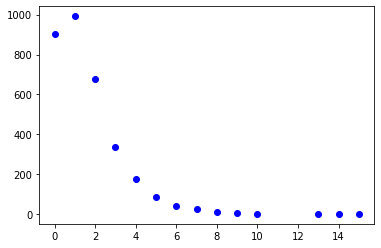

In [22]:
plt.plot(df['home_score'].value_counts(), 'bo')
#badanie liczby strzelonych bramek, jakie wyiki były najczęściej

In [23]:
df['away_score'].value_counts()
#ponad 10 bramek rzadko

0     1326
1     1048
2      510
3      211
4       99
5       30
6       15
7        5
10       4
8        3
11       2
9        1
14       1
Name: away_score, dtype: int64

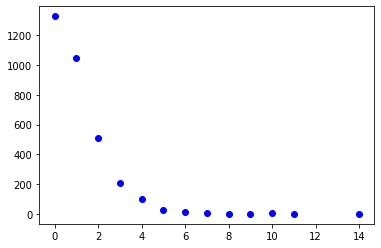

In [24]:
plt.plot(df['away_score'].value_counts(), 'bo')
#to samo dla drużyny gości

In [25]:
higher_home=16
higher_away=10
df=df[(df["home_score"]<=higher_home) & (df["away_score"]<=higher_away)]
df.head(5)
#rzadko pada ponad 16 bramek dla gospodarzy i ponad 10 dla gości, więc pozbywamy się tych danych dla lepszego dopasowania modelu

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,total_points_home,previous_points_home,rank_home,rank_change_home,total_points_away,previous_points_away,rank_away,rank_change_away
0,2018-11-01,Denmark,Sweden,0,1,Friendly,Abu Dhabi,United Arab Emirates,True,1584.0,1581.0,10.0,0.0,1548.0,1550.0,17.0,2.0
1,2018-11-01,Indonesia,Iceland,0,6,Friendly,Sleman,Indonesia,False,1004.0,997.0,160.0,-4.0,1458.0,1461.0,36.0,0.0
2,2018-11-01,Jordan,Finland,1,2,Friendly,Abu Dhabi,United Arab Emirates,True,1189.0,1189.0,112.0,2.0,1392.0,1378.0,56.0,-2.0
3,2018-09-05,Algeria,Saudi Arabia,0,2,Friendly,Cádiz,Spain,True,1351.0,1352.0,66.0,0.0,1336.0,1348.0,70.0,3.0
4,2018-11-05,Kuwait,Palestine,2,0,Friendly,Kuwait City,Kuwait,False,1020.0,1014.0,157.0,-2.0,1233.0,1225.0,99.0,-1.0


In [26]:
#wprowadzan kolejną kolumnę - Results do określenia czy wygrana, remis czy przegrana
conditions  = [df["home_score"] ==df["away_score"], df["home_score"] > df["away_score"] , df["home_score"] < df["away_score"]]
choices     = [ "Draw", 'Win', 'Lost' ]
df["Result"] = np.select(conditions, choices)
df.head(5)

<ipython-input-26-cabd2966b80f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Result"] = np.select(conditions, choices)


,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,total_points_home,previous_points_home,rank_home,rank_change_home,total_points_away,previous_points_away,rank_away,rank_change_away,Result
0,2018-11-01,Denmark,Sweden,0,1,Friendly,Abu Dhabi,United Arab Emirates,True,1584.0,1581.0,10.0,0.0,1548.0,1550.0,17.0,2.0,Lost
1,2018-11-01,Indonesia,Iceland,0,6,Friendly,Sleman,Indonesia,False,1004.0,997.0,160.0,-4.0,1458.0,1461.0,36.0,0.0,Lost
2,2018-11-01,Jordan,Finland,1,2,Friendly,Abu Dhabi,United Arab Emirates,True,1189.0,1189.0,112.0,2.0,1392.0,1378.0,56.0,-2.0,Lost
3,2018-09-05,Algeria,Saudi Arabia,0,2,Friendly,Cádiz,Spain,True,1351.0,1352.0,66.0,0.0,1336.0,1348.0,70.0,3.0,Lost
4,2018-11-05,Kuwait,Palestine,2,0,Friendly,Kuwait City,Kuwait,False,1020.0,1014.0,157.0,-2.0,1233.0,1225.0,99.0,-1.0,Win


In [27]:
#sprawdzam ile było jakich rodzjów meczów
number_of_tournaments = df.tournament.unique()
print(len(number_of_tournaments))
print(df.tournament.unique())
print(df.tournament.value_counts())

36
['Friendly' 'COSAFA Cup' 'Intercontinental Cup' 'FIFA World Cup'
 'UEFA Nations League' 'African Cup of Nations qualification' 'SAFF Cup'
 'CONCACAF Nations League qualification' 'Kirin Challenge Cup'
 'Superclásico de las Américas' 'AFF Championship' 'EAFF Championship'
 'AFC Asian Cup' 'UEFA Euro qualification'
 'African Nations Championship qualification'
 'FIFA World Cup qualification' 'Copa América' 'Gold Cup'
 'African Cup of Nations' 'Pacific Games' 'CONCACAF Nations League'
 'Gulf Cup' 'Baltic Cup' 'UEFA Euro' 'Arab Cup qualification'
 'Gold Cup qualification' 'Three Nations Cup'
 'AFC Asian Cup qualification' 'Mahinda Rajapaksa Cup' 'Arab Cup'
 'Navruz Cup' 'CONMEBOL–UEFA Cup of Champions' 'Kirin Cup'
 "MSG Prime Minister's Cup" "King's Cup" 'Jordan International Tournament']
Friendly                                      901
FIFA World Cup qualification                  803
UEFA Nations League                           418
UEFA Euro qualification                       259
A

In [ ]:
# from os import listxattr
# from sklearn import preprocessing
# df2 = df
# le = preprocessing.LabelEncoder()
# le.fit(df["tournament"])
# list(le.classes_)
# le.transform(df["tournament"])
# #zamieniam nazwy różnych rodzajów meczów na numerki


In [28]:
lista = df["tournament"].values.tolist()


In [29]:
# Sprawdzam jakich rodzajów meczy było najwięcej
from collections import Counter
x = Counter(lista)
sorted(x)
[(l,k) for k,l in sorted([(j,i) for i,j in x.items()], reverse=True)]

[('Friendly', 901),
 ('FIFA World Cup qualification', 803),
 ('UEFA Nations League', 418),
 ('UEFA Euro qualification', 259),
 ('African Cup of Nations qualification', 174),
 ('CONCACAF Nations League', 89),
 ('African Cup of Nations', 82),
 ('African Nations Championship qualification', 57),
 ('Copa América', 54),
 ('UEFA Euro', 51),
 ('Gold Cup', 49),
 ('COSAFA Cup', 45),
 ('AFC Asian Cup', 44),
 ('Arab Cup', 32),
 ('CONCACAF Nations League qualification', 27),
 ('AFC Asian Cup qualification', 24),
 ('AFF Championship', 20),
 ('SAFF Cup', 15),
 ('Pacific Games', 15),
 ('Gulf Cup', 15),
 ('Kirin Challenge Cup', 13),
 ('FIFA World Cup', 10),
 ('Mahinda Rajapaksa Cup', 7),
 ('EAFF Championship', 7),
 ("MSG Prime Minister's Cup", 6),
 ('Arab Cup qualification', 6),
 ('Kirin Cup', 4),
 ("King's Cup", 4),
 ('Jordan International Tournament', 4),
 ('Intercontinental Cup', 4),
 ('Gold Cup qualification', 4),
 ('Baltic Cup', 3),
 ('Superclásico de las Américas', 2),
 ('Navruz Cup', 2),
 ('Thr

In [30]:
lista_najczestszych = x.most_common(10)
#wprowadzam zmienną pokazująca najczęstsze rodzaje meczów/turniejów

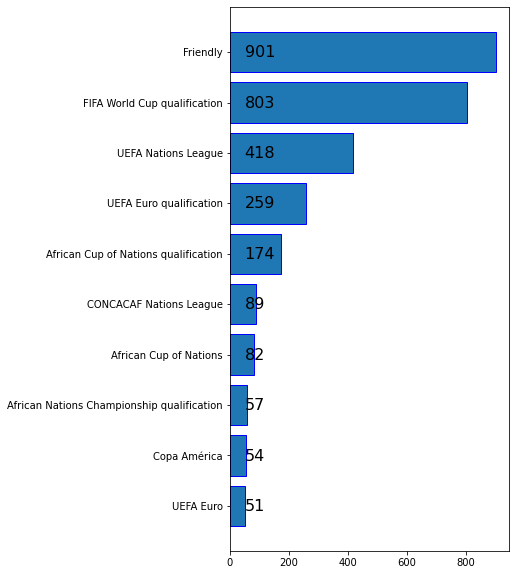

In [31]:
rank_bound = len(lista_najczestszych) 
#wysokość wykresu się automatycznie dopasowuje do liczby najczęstszych rodzajów meczów
ax = df.tournament.value_counts()[:rank_bound].sort_values()
value = ax.values
label = ax.index

plt.figure(figsize=(5,10))
plt.barh(y=label, width=value, edgecolor="b")
for i in range(rank_bound):
    plt.text(x=50,y=i-0.1,s=value[i],color="k",fontsize=16)
plt.show()

In [32]:
#poniżej widać tylko wyniki dla meczów w MŚ
df2=df.loc[df["tournament"] == "FIFA World Cup"]
df2.head(5)
#robię odrębną wydzieloną tabelke tylko z wynikami z mistrzostw swiata

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,total_points_home,previous_points_home,rank_home,rank_change_home,total_points_away,previous_points_away,rank_away,rank_change_away,Result
21,2018-10-07,France,Belgium,1,0,FIFA World Cup,Saint Petersburg,Russia,True,1729.00,1726.00,1.0,0.0,1729.00,1723.00,1.0,-1.0,Win
22,2018-11-07,Croatia,England,2,1,FIFA World Cup,Moscow,Russia,True,1635.00,1634.00,4.0,0.0,1619.00,1612.00,5.0,-1.0,Win
3247,2022-01-12,Japan,Spain,2,1,FIFA World Cup,Al Rayyan,Qatar,True,1531.53,1531.53,26.0,0.0,1704.75,1704.75,7.0,0.0,Win
3248,2022-01-12,Costa Rica,Germany,2,4,FIFA World Cup,Al Khor,Qatar,True,1437.43,1437.43,49.0,0.0,1648.33,1648.33,12.0,1.0,Lost
3249,2022-01-12,Croatia,Belgium,0,0,FIFA World Cup,Al Rayyan,Qatar,True,1620.74,1620.74,15.0,0.0,1828.45,1828.45,1.0,0.0,Draw


In [33]:
df2.describe()

,home_score,away_score,total_points_home,previous_points_home,rank_home,rank_change_home,total_points_away,previous_points_away,rank_away,rank_change_away
count,10.000000,10.000000,10.00000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,1.300000,1.400000,1534.85200,1533.296000,28.800000,-0.500000,1680.001000,1676.812000,9.400000,-0.100000
std,0.823273,1.349897,103.61007,100.066869,19.019288,5.190804,93.681689,96.626497,8.435375,0.737865
min,0.000000,0.000000,1381.45000,1428.970000,1.000000,-12.000000,1529.930000,1525.500000,1.000000,-1.000000
25%,1.000000,0.250000,1466.94500,1443.652500,17.500000,0.000000,1624.957500,1619.707500,2.750000,-0.750000
50%,1.500000,1.000000,1527.19000,1519.385000,27.500000,0.000000,1654.290000,1654.290000,7.500000,0.000000
75%,2.000000,2.000000,1602.40000,1602.400000,39.500000,0.000000,1722.937500,1718.437500,13.500000,0.000000
max,2.000000,4.000000,1729.00000,1726.000000,61.000000,9.000000,1828.450000,1828.450000,28.000000,1.000000


In [34]:
df2['home_score'].value_counts()
#widać że na mistrzostwach ogólnie pada mniej bramek na mecz niż w zbiorze wszystkich możliwych meczów

2    5
1    3
0    2
Name: home_score, dtype: int64

In [35]:
df2['away_score'].value_counts()

0    3
1    3
2    2
4    1
3    1
Name: away_score, dtype: int64

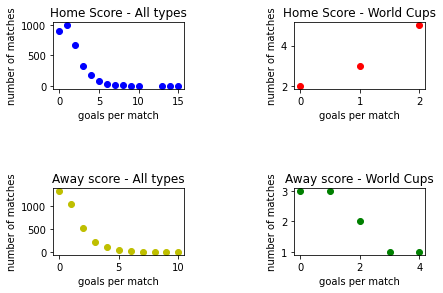

In [36]:
fig, axs = plt.subplots(2, 2)
fig.tight_layout(pad=5.0)
axs[0, 0].plot(df['home_score'].value_counts(), 'bo')
axs[0, 0].set_title('Home Score - All types')
axs[0, 1].plot(df2['home_score'].value_counts(), 'ro')
axs[0, 1].set_title('Home Score - World Cups')
axs[1, 0].plot(df['away_score'].value_counts(), 'yo')
axs[1, 0].set_title('Away score - All types')
axs[1, 1].plot(df2['away_score'].value_counts(), 'go')
axs[1, 1].set_title('Away score - World Cups')
spacing = 0.005
fig.subplots_adjust(bottom=spacing, left=spacing)

for ax in axs.flat:
    ax.set(xlabel='goals per match', ylabel='number of matches')

In [37]:
data_home=df.loc[(df["home_team"]==df["country"]) & (df["tournament"]=="FIFA World Cup")]
data_home.head(5)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,total_points_home,previous_points_home,rank_home,rank_change_home,total_points_away,previous_points_away,rank_away,rank_change_away,Result


Text(0.5, 1.0, 'Home Team - Results')

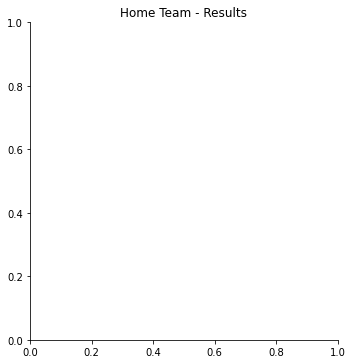

In [38]:
sns.displot(data_home, x="Result")
plt.title("Home Team - Results")

In [39]:
result_home = data_home["Result"].value_counts()
print(result_home)

Series([], Name: Result, dtype: int64)


In [40]:
df_match=df.copy()
df_match.head(5)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,total_points_home,previous_points_home,rank_home,rank_change_home,total_points_away,previous_points_away,rank_away,rank_change_away,Result
0,2018-11-01,Denmark,Sweden,0,1,Friendly,Abu Dhabi,United Arab Emirates,True,1584.0,1581.0,10.0,0.0,1548.0,1550.0,17.0,2.0,Lost
1,2018-11-01,Indonesia,Iceland,0,6,Friendly,Sleman,Indonesia,False,1004.0,997.0,160.0,-4.0,1458.0,1461.0,36.0,0.0,Lost
2,2018-11-01,Jordan,Finland,1,2,Friendly,Abu Dhabi,United Arab Emirates,True,1189.0,1189.0,112.0,2.0,1392.0,1378.0,56.0,-2.0,Lost
3,2018-09-05,Algeria,Saudi Arabia,0,2,Friendly,Cádiz,Spain,True,1351.0,1352.0,66.0,0.0,1336.0,1348.0,70.0,3.0,Lost
4,2018-11-05,Kuwait,Palestine,2,0,Friendly,Kuwait City,Kuwait,False,1020.0,1014.0,157.0,-2.0,1233.0,1225.0,99.0,-1.0,Win


In [41]:
#przerabiam pełną datę na rok
years = []
for date in df.date:
    years.append(int(str(date)[0:4]))

In [42]:
df_match.tail()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,total_points_home,previous_points_home,rank_home,rank_change_home,total_points_away,previous_points_away,rank_away,rank_change_away,Result
3250,2022-01-12,Canada,Morocco,1,2,FIFA World Cup,Doha,Qatar,True,1462.32,1462.32,40.0,0.0,1529.93,1525.50,28.0,0.0,Lost
3251,2022-02-12,Serbia,Switzerland,2,3,FIFA World Cup,Doha,Qatar,True,1547.38,1547.38,25.0,2.0,1642.83,1642.83,14.0,1.0,Lost
3252,2022-02-12,Cameroon,Brazil,1,0,FIFA World Cup,Lusail,Qatar,True,1480.82,1437.35,38.0,-12.0,1823.42,1826.35,2.0,0.0,Win
3253,2022-02-12,Ghana,Uruguay,0,2,FIFA World Cup,Al Wakrah,Qatar,True,1381.45,1428.97,61.0,9.0,1614.05,1596.66,16.0,-1.0,Lost
3254,2022-02-12,South Korea,Portugal,2,1,FIFA World Cup,Al Rayyan,Qatar,True,1522.85,1507.24,29.0,-4.0,1660.25,1660.25,8.0,0.0,Win


In [43]:
#żeby pozycja w meczu nie wpływała na wynik zamieniam w New_Dataset_part_2 pozycję dwóch drużyn - na MŚ pozycja drużyn typu A vs B lub B vs A na nic nie wpływa bo żadna z nich oprócz Kataru nie gra jako gospordarz
New_Dataset_part_1=pd.DataFrame(list(zip(years,df_match.values[:,7],df_match.values[:,1],df_match.values[:,2],df_match.values[:,11],df_match.values[:,15],df_match.values[:,3],df_match.values[:,4])),columns=["year","Country","team_1","team_2","team_1_rank","team_2_rank","team_1_score","team_2_score"])
New_Dataset_part_2=pd.DataFrame(list(zip(years,df_match.values[:,7],df_match.values[:,2],df_match.values[:,1],df_match.values[:,15],df_match.values[:,11],df_match.values[:,4],df_match.values[:,3])),columns=["year","Country","team_1","team_2","team_1_rank","team_2_rank","team_1_score","team_2_score"])
New_Dataset=pd.concat([New_Dataset_part_1,New_Dataset_part_2],axis=0)

In [44]:
#Łączenie zbiorów prz
New_Dataset = New_Dataset.sample(frac=1).reset_index(drop=True)
#New_Dataset = New_Dataset[New_Dataset.year >2018]
New_Dataset.head()
#shuffling
# frac=1 bo frac to: Fraction of axis items to return. Cannot be used with n.

,year,Country,team_1,team_2,team_1_rank,team_2_rank,team_1_score,team_2_score
0,2019,Ethiopia,Ethiopia,Djibouti,150.0,197.0,4,3
1,2019,Sweden,Sweden,Norway,18.0,50.0,1,1
2,2021,Netherlands,Ukraine,Netherlands,24.0,16.0,2,3
3,2018,Georgia,Georgia,Latvia,96.0,129.0,1,0
4,2019,Austria,Slovenia,Austria,65.0,26.0,0,1


In [45]:
New_Dataset.tail()
team_1_rank	 = New_Dataset[['team_1', 'team_1_rank']]
print(team_1_rank	)

           team_1  team_1_rank
0        Ethiopia        150.0
1          Sweden         18.0
2         Ukraine         24.0
3         Georgia         96.0
4        Slovenia         65.0
...           ...          ...
6499    Mauritius        157.0
6500     Ethiopia        140.0
6501  El Salvador         69.0
6502     Colombia         11.0
6503       Uganda         90.0

[6504 rows x 2 columns]


In [46]:
teams_1 = New_Dataset.team_1.unique()
contries = New_Dataset.Country.unique()
all_countries = np.unique(np.concatenate((teams_1,contries), axis=0))

In [47]:
#do modelu użyję danych - wyniki - liczba goli strzelonych przez jedną i drugą drużynę
# Y - labels

Y = New_Dataset.iloc[:,6:8]

categorized_data=New_Dataset.iloc[:,0:6].copy()

from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
label_encoder.fit(all_countries)
categorized_data['team_1']=label_encoder.transform(categorized_data['team_1'])
categorized_data['team_2']=label_encoder.transform(categorized_data['team_2'])
categorized_data['Country']=label_encoder.transform(categorized_data['Country'])
categorized_data['team_1']=categorized_data['team_1'].astype("category")
categorized_data['team_2']=categorized_data['team_2'].astype("category")
categorized_data['Country']=categorized_data['team_2'].astype("category")
categorized_data['team_1_rank']=categorized_data['team_1_rank'].astype("category")
categorized_data['team_2_rank']=categorized_data['team_2_rank'].astype("category")

In [48]:
categorized_data.head()

,year,Country,team_1,team_2,team_1_rank,team_2_rank
0,2019,53,64,53,150.0,197.0
1,2019,138,178,138,18.0,50.0
2,2021,129,196,129,24.0,16.0
3,2018,102,71,102,96.0,129.0
4,2019,12,168,12,65.0,26.0


In [49]:
Y.head(5)

,team_1_score,team_2_score
0,4,3
1,1,1
2,2,3
3,1,0
4,0,1


In [50]:
print(categorized_data.info())
print(Y.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6504 entries, 0 to 6503
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   year         6504 non-null   int64   
 1   Country      6504 non-null   category
 2   team_1       6504 non-null   category
 3   team_2       6504 non-null   category
 4   team_1_rank  6504 non-null   category
 5   team_2_rank  6504 non-null   category
dtypes: category(5), int64(1)
memory usage: 163.0 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6504 entries, 0 to 6503
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   team_1_score  6504 non-null   int64
 1   team_2_score  6504 non-null   int64
dtypes: int64(2)
memory usage: 101.8 KB
None


In [51]:
# X - features
X = categorized_data.values

from sklearn.multioutput import MultiOutputRegressor
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

# Lasy losowe są uważane za bardzo dokładną i niezawodną metodę ze względu na liczbę drzew decyzyjnych uczestniczących w procesie.
# Nie ma problemu nadmiernego dopasowania. Głównym powodem jest to, że bierze średnią ze wszystkich prognoz, co eliminuje uprzedzenia.
# Algorytm może być stosowany zarówno w problemach klasyfikacji, jak i regresji. Sprawdza się dlatego bardzo dobrze np w piłce nożnej.
# Można uzyskać względną ważność funkcji, która pomaga w wyborze cech najbardziej przyczyniających się do klasyfikatora.

In [52]:
print(X)
#X to array z 6 pozycjami jak wyżej w zbiorze categorized_data

[[2019.   53.   64.   53.  150.  197.]
 [2019.  138.  178.  138.   18.   50.]
 [2021.  129.  196.  129.   24.   16.]
 ...
 [2021.  150.   58.  150.   69.   58.]
 [2018.  198.   42.  198.   11.   23.]
 [2022.  106.  195.  106.   90.  121.]]


In [53]:
model = MultiOutputRegressor(RandomForestClassifier())
model.fit(X,Y)

MultiOutputRegressor(estimator=RandomForestClassifier())

In [54]:
prd=model.predict(X)
prd

array([[4, 3],
       [1, 1],
       [2, 3],
       ...,
       [0, 3],
       [4, 2],
       [0, 0]])

In [55]:
score_team_1=[i[0] for i in prd]
score_team_2=[i[1] for i in prd]

In [56]:
from sklearn.metrics import classification_report
report_1=classification_report(Y.iloc[:,0],score_team_1)
print(report_1)

              precision    recall  f1-score   support

           0       0.96      0.97      0.97      2226
           1       0.96      0.96      0.96      2040
           2       0.96      0.94      0.95      1187
           3       0.95      0.96      0.95       546
           4       0.98      0.94      0.96       273
           5       0.97      0.96      0.96       117
           6       0.98      0.96      0.97        54
           7       0.97      0.97      0.97        29
           8       1.00      1.00      1.00        15
           9       1.00      1.00      1.00         7
          10       1.00      1.00      1.00         5
          13       1.00      1.00      1.00         2
          14       1.00      1.00      1.00         2
          15       1.00      1.00      1.00         1

    accuracy                           0.96      6504
   macro avg       0.98      0.98      0.98      6504
weighted avg       0.96      0.96      0.96      6504



In [57]:
report_2=classification_report(Y.iloc[:,1],score_team_2)
print(report_2)

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      2226
           1       0.96      0.96      0.96      2040
           2       0.95      0.95      0.95      1187
           3       0.96      0.95      0.95       546
           4       0.98      0.94      0.96       273
           5       0.99      0.93      0.96       117
           6       1.00      0.94      0.97        54
           7       0.94      1.00      0.97        29
           8       1.00      1.00      1.00        15
           9       1.00      1.00      1.00         7
          10       1.00      1.00      1.00         5
          13       1.00      1.00      1.00         2
          14       1.00      1.00      1.00         2
          15       1.00      1.00      1.00         1

    accuracy                           0.96      6504
   macro avg       0.98      0.98      0.98      6504
weighted avg       0.96      0.96      0.96      6504



In [ ]:
######################################################################

In [58]:
year=2022
stadium="Qatar"
stadium_num=label_encoder.transform([stadium])[0]
host_num=stadium_num
#dane dla World Cup 2022

In [ ]:
third_round = [('Senegal','Ecuador'), 
     ('Qatar', 'Netherlands'),
     ('Wales','England'),
     ('Iran','United States'),
     ('Argentina','Poland'),
     ('Saudi Arabia','Mexico'),
     ('Australia','Denmark'),
     ('Tunisia','France'),
     ('Japan','Spain'),
     ('Costa Rica','Germany'),
     ('Croatia','Belgium'),
     ('Canada','Morocco'),
     ('Serbia','Switzerland'),
     ('Cameroon','Brazil'),
     ('Ghana','Uruguay'),
     ('South Korea','Portugal'),]

In [ ]:
print('### THIRD ROUND PREDICTED RESULTS ###\n')
for pair in third_round:
    team_1 = pair[0]
    team_2 = pair[1]
    team_1_num=label_encoder.transform([team_1])[0]
    team_2_num=label_encoder.transform([team_2])[0]
    team_1_rank = int(ranking.loc[ranking['country_full'] == team_1, ['rank']].iloc[0])
    team_2_rank = int(ranking.loc[ranking['country_full'] == team_2, ['rank']].iloc[0])
    Input_vector=np.array([[year,stadium_num,team_1_num,team_2_num,team_1_rank,team_2_rank]])
    res=model.predict(Input_vector)
    win,prob_lst=select_winning_team(res)
    if win==0:
        print(f"{team_1} vs {team_2} \n  Results of the Match {res[0]}\t   {team_1} wins")
    elif win==1:
        print(f"{team_1} vs {team_2} \n  Results of the Match {res[0]}\t   {team_2} wins")
    elif win==2:
        print(f"{team_1} vs {team_2} \n  Results of the Match {res[0]}\t   Match Draw") 

### THIRD ROUND PREDICTED RESULTS ###

Senegal vs Ecuador 
  Results of the Match [1 0]	   Senegal wins
Qatar vs Netherlands 
  Results of the Match [0 2]	   Netherlands wins
Wales vs England 
  Results of the Match [1 2]	   England wins
Iran vs United States 
  Results of the Match [0 0]	   Match Draw
Argentina vs Poland 
  Results of the Match [1 0]	   Argentina wins
Saudi Arabia vs Mexico 
  Results of the Match [1 0]	   Saudi Arabia wins
Australia vs Denmark 
  Results of the Match [0 2]	   Denmark wins
Tunisia vs France 
  Results of the Match [2 2]	   Match Draw
Japan vs Spain 
  Results of the Match [2 1]	   Japan wins
Costa Rica vs Germany 
  Results of the Match [0 2]	   Germany wins
Croatia vs Belgium 
  Results of the Match [1 0]	   Croatia wins
Canada vs Morocco 
  Results of the Match [0 2]	   Morocco wins
Serbia vs Switzerland 
  Results of the Match [2 1]	   Serbia wins
Cameroon vs Brazil 
  Results of the Match [0 0]	   Match Draw
Ghana vs Uruguay 
  Results of the Matc

In [ ]:
play_offs_best_16 = [('Netherlands','United States'), 
     ('Argentina', 'Australia'),
     ('Senegal','England'),
     ('France','Poland'),
     ('Japan','Croatia'),
     ('Morocco','Spain'),
     ('South Korea','Brazil'),
     ('Portugal','Switzerland'),]

In [ ]:
print('### PLAY OFFS 1/8 PREDICTED RESULTS ###\n')
for pair in play_offs_best_16:
    team_1 = pair[0]
    team_2 = pair[1]
    team_1_num=label_encoder.transform([team_1])[0]
    team_2_num=label_encoder.transform([team_2])[0]
    team_1_rank = int(ranking.loc[ranking['country_full'] == team_1, ['rank']].iloc[0])
    team_2_rank = int(ranking.loc[ranking['country_full'] == team_2, ['rank']].iloc[0])
    Input_vector=np.array([[year,stadium_num,team_1_num,team_2_num,team_1_rank,team_2_rank]])
    res=model.predict(Input_vector)
    win,prob_lst=select_winning_team(res)
    if win==0:
        print(f"{team_1} vs {team_2} \n  Results of the Match {res[0]}\t   {team_1} wins")
    elif win==1:
        print(f"{team_1} vs {team_2} \n  Results of the Match {res[0]}\t   {team_2} wins")
    elif win==2:
        print(f"{team_1} vs {team_2} \n  Results of the Match {res[0]}\t   Match Draw") 

### PLAY OFFS 1/8 PREDICTED RESULTS ###



NameError: ignored

In [ ]:
play_offs_best_8 = [('Netherlands','Argentina'), 
     ('France','England'),
     ('Brazil','Croatia'),
     ('Portugal','Morocco'),]

In [ ]:
play_offs_best_4 = [('Argentina','Croatia'), 
     ('France','Morocco')]

In [ ]:
import random
from random import randint
def select_winning_team(probability_array):
    prob_lst = [round(probability_array[0][i],3) for i in range(2)]
    if (prob_lst[0] > prob_lst[1]):
        out=0
    elif (prob_lst[0] < prob_lst[1]):
        out=1
    elif (prob_lst[0] == prob_lst[1]):
        out=randint(0,2)
    return out,prob_lst

In [ ]:
print('### PLAY OFFS 1/2 PREDICTED RESULTS ###\n')
for pair in play_offs_best_4:
    team_1 = pair[0]
    team_2 = pair[1]
    team_1_num=label_encoder.transform([team_1])[0]
    team_2_num=label_encoder.transform([team_2])[0]
    team_1_rank = int(ranking.loc[ranking['country_full'] == team_1, ['rank']].iloc[0])
    team_2_rank = int(ranking.loc[ranking['country_full'] == team_2, ['rank']].iloc[0])
    Input_vector=np.array([[year,stadium_num,team_1_num,team_2_num,team_1_rank,team_2_rank]])
    res=model.predict(Input_vector)
    win,prob_lst=select_winning_team(res)
    if win==0:
        print(f"{team_1} vs {team_2} \n  Results of the Match {res[0]}\t   {team_1} wins")
    elif win==1:
        print(f"{team_1} vs {team_2} \n  Results of the Match {res[0]}\t   {team_2} wins")
    elif win==2:
        print(f"{team_1} vs {team_2} \n  Results of the Match {res[0]}\t   Match Draw") 

### PLAY OFFS 1/2 PREDICTED RESULTS ###

Argentina vs Croatia 
  Results of the Match [1 0]	   Argentina wins
France vs Morocco 
  Results of the Match [1 1]	   France wins


In [64]:
third_place = [('Croatia', 'Morocco')]

In [65]:
import random
from random import randint
def select_winning_team(probability_array):
    prob_lst = [round(probability_array[0][i],3) for i in range(2)]
    if (prob_lst[0] > prob_lst[1]):
        out=0
    elif (prob_lst[0] < prob_lst[1]):
        out=1
    elif (prob_lst[0] == prob_lst[1]):
        out=randint(0,2)
    return out,prob_lst

In [66]:
print('### third place PREDICTED RESULTS ###\n')
for pair in third_place:
    team_1 = pair[0]
    team_2 = pair[1]
    team_1_num=label_encoder.transform([team_1])[0]
    team_2_num=label_encoder.transform([team_2])[0]
    team_1_rank = int(ranking.loc[ranking['country_full'] == team_1, ['rank']].iloc[0])
    team_2_rank = int(ranking.loc[ranking['country_full'] == team_2, ['rank']].iloc[0])
    Input_vector=np.array([[year,stadium_num,team_1_num,team_2_num,team_1_rank,team_2_rank]])
    res=model.predict(Input_vector)
    win,prob_lst=select_winning_team(res)
    if win==0:
        print(f"{team_1} vs {team_2} \n  Results of the Match {res[0]}\t   {team_1} wins")
    elif win==1:
        print(f"{team_1} vs {team_2} \n  Results of the Match {res[0]}\t   {team_2} wins")
    elif win==2:
        print(f"{team_1} vs {team_2} \n  Results of the Match {res[0]}\t   Match Draw") 

### third place PREDICTED RESULTS ###

Croatia vs Morocco 
  Results of the Match [1 0]	   Croatia wins
